# Лабораторная работа № 6: Классификация. Градиентный бустинг

## 1. Загрузка датасета

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/data.csv')

## 2. Датасет и подготовка данных:

### 2.1 Привести описание датасета.

Heart Failure Prediction Dataset - https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data
Сердечно-сосудистые заболевания (ССЗ) являются причиной смерти № 1 во всем мире, ежегодно унося, по оценкам, 17,9 миллиона жизней, что составляет 31% всех смертей во всем мире. Четыре из пяти смертей от сердечно-сосудистых заболеваний происходят в результате сердечных приступов и инсультов, и треть этих смертей происходит преждевременно у людей в возрасте до 70 лет. 
Вот табличное описание атрибутов датасета:

| Атрибут           | Описание                                                                                   | Тип данных         |
|-------------------|--------------------------------------------------------------------------------------------|-------------------|
| Age               | Возраст пациента [лет]                                                                     | Количественный    |
| Sex               | Пол пациента [М: Мужчина, F: Женщина]                                                       | Категориальный    |
| ChestPainType     | Тип боли в груди [TA: Типичная ангина, ATA: Атипичная ангина, NAP: Неангинальная боль, ASY: Асимптоматическая] | Категориальный    |
| RestingBP         | Артериальное давление в покое [мм рт. ст.]                                                 | Количественный    |
| Cholesterol       | Уровень холестерина в сыворотке крови [мг/дл]                                               | Количественный    |
| FastingBS         | Уровень глюкозы в крови натощак [1: если FastingBS > 120 мг/дл, 0: в противном случае]     | Категориальный    |
| RestingECG        | Результаты электрокардиограммы в покое [Нормально: Нормально, ST: Аномалии волны ST-T (инверсии волны T и/или повышение или понижение ST более 0.05 мВ), LVH: Вероятное или определенное увеличение левого желудочка по критериям Estes] | Категориальный    |
| MaxHR             | Максимальная достигнутая частота сердечных сокращений [Числовое значение между 60 и 202] | Количественный    |
| ExerciseAngina    | Ангина, вызванная физической нагрузкой [Y: Да, N: Нет]                                       | Категориальный    |
| Oldpeak           | Oldpeak = ST [Числовое значение, измеренное в депрессии]                                    | Количественный    |
| ST_Slope          | Наклон пика сегмента ST при максимальной нагрузке [Up: восходящий, Flat: плоский, Down: нисходящий] | Категориальный    |
| HeartDisease      | Выходной класс [1: сердечное заболевание, 0: Нормально]                                     | Котегориальный    |

Этот датасет содержит информацию о 11 признаках, которые могут использоваться для прогнозирования возможного сердечного заболевания.

### 2.2 Осуществить предобработку данных (избавиться от null, убрать некоторые признаки и т.п.) - "подчистить данные".

Предобработка данных не требуется

### 2.3 Нормализовать численные данные.

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
df['HeartDisease'].replace(1, 'Yes', inplace=True)
df['HeartDisease'].replace(0, 'No', inplace=True)
numeric = [df.columns[i] for i in range(df.shape[1]) if df.dtypes[df.columns[i]] != 'object']
numeric


['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [5]:
scaler = StandardScaler()
scaler.fit(df[numeric])
df[numeric] = scaler.transform(df[numeric])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,M,ATA,0.410909,0.825070,-0.551341,Normal,1.382928,N,-0.832432,Up,No
1,-0.478484,F,NAP,1.491752,-0.171961,-0.551341,Normal,0.754157,N,0.105664,Flat,Yes
2,-1.751359,M,ATA,-0.129513,0.770188,-0.551341,ST,-1.525138,N,-0.832432,Up,No
3,-0.584556,F,ASY,0.302825,0.139040,-0.551341,Normal,-1.132156,Y,0.574711,Flat,Yes
4,0.051881,M,NAP,0.951331,-0.034755,-0.551341,Normal,-0.581981,N,-0.832432,Up,No


### 2.4 Разбить выборку на обучающую и тестовую.

> Из датафреймов обучающей и тестовой выборки необходимо сформировать два набора обучающей и тестовой выборок: с закодированными категориальными признаками и с категориальными признаками без обработки.

In [6]:
X, y = df.drop(['HeartDisease'], axis=1), df['HeartDisease']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train_categor, X_test_categor, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(y_train.shape, y_test.shape)

(642,) (276,)


In [9]:
X_train_num, X_test_num =  X_train_categor.copy(), X_test_categor.copy()

In [10]:
obj_category = [var for var in df.columns if df[var].dtype == 'object']
obj_category

['Sex',
 'ChestPainType',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'HeartDisease']

In [11]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
categ_for_lable_encode = ['ChestPainType','RestingECG','ST_Slope']
for category in categ_for_lable_encode:
    X_train_num[category] = labelEncoder.fit_transform(X_train_num[category])
    X_test_num[category] = labelEncoder.fit_transform(X_test_num[category])

In [12]:
categ_for_hot_encode = ['Sex', 'ExerciseAngina']
X_train_num = pd.get_dummies(data=X_train_num, columns=categ_for_hot_encode, drop_first=False, dtype='int')
X_test_num = pd.get_dummies(data=X_test_num, columns=categ_for_hot_encode, drop_first=False, dtype='int')

## 3. Для каждого из классификаторов ($AdaBoost$, $GradientBoostingClassifier$, $XGBoost$, $CatBoost$):

   - С использованием `GridSearchCV`/`grid_search` осуществить подбор гиперпараметра модели, использовать выборки с закодированными категориальными признаками.
     > Как минимум основных: `n_estimators`/`iterations`, `learning_rate`, `depth`, параметры регуляризации $L^1$, $L^2$. Для ускорения вычислений можно сразу с заданным значением `early_stopping_rounds` &ndash; тогда понадобится еще выделить валидационный датасет ($XGBoost$) или задать значение `train_size` у $CatBoost$ (часть обучающей выборки пойдет в валидационный набор).
   - Обучить модели $XGBoost$ и $CatBoost$ с найденными гиперпараметрами на обучающей выборке с категориальными признаками "как есть".
   - Итого получить 6 обученных моделей.
   - Вывести метрики на тестовом наборе (как минимум `classification_report`, другие по желанию).
   - Сравнить модели, выбрать лучшую.
     > Ожидаемый результат &ndash; $XGBoost$/$CatBoost$.

### 3.1 С использованием `GridSearchCV`/`grid_search` осуществить подбор гиперпараметра модели, использовать выборки с закодированными категориальными признаками.

In [13]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

In [14]:
AdaBoost_grid = {
    'n_estimators': range(10, 101, 10),
    'learning_rate': np.arange(0.01, 0.52, 0.05),
}

AdaBoost_model = AdaBoostClassifier(algorithm="SAMME")

AdaBoost_search = GridSearchCV(AdaBoost_model, AdaBoost_grid, cv=3)
AdaBoost_search.fit(X_train_num, y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(algorithm='SAMME'),
             param_grid={'learning_rate': array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51]),
                         'n_estimators': range(10, 101, 10)})

In [15]:
AdaBoost_search.best_params_

{'learning_rate': 0.21000000000000002, 'n_estimators': 80}

In [16]:
gradient_grid = {
    'n_estimators': range(10, 101, 10),
    'learning_rate': np.arange(0.01, 0.52, 0.1),
    'max_depth': range(1, 6),
}

gradient_model = GradientBoostingClassifier()

gradient_search = GridSearchCV(
    gradient_model, gradient_grid, cv = 3)

gradient_search.fit(X_train_num, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51]),
                         'max_depth': range(1, 6),
                         'n_estimators': range(10, 101, 10)})

In [17]:
gradient_search.best_params_

{'learning_rate': 0.11, 'max_depth': 3, 'n_estimators': 50}

In [18]:
xgb_grid = {
    'n_estimators': range(10, 101, 10),
    'learning_rate': np.arange(0.01, 0.52, 0.1),
    'max_depth': range(1, 6),
}

xgb_model = XGBClassifier()

xgb_search = GridSearchCV(xgb_model, xgb_grid, cv=3)


y_train_map = y_train.copy()
y_train_map.replace({'Yes': 1, 'No': 0}, inplace=True)
xgb_search.fit(X_train_num, y_train_map)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51]),
                         'max_depth': range(1, 6),
                         'n_estimators': range(10, 101, 10)})

In [19]:
xgb_search.best_params_

{'learning_rate': 0.11, 'max_depth': 4, 'n_estimators': 100}

In [20]:
xgb_grid = {
    'n_estimators': [100],
    'learning_rate': [0.11],
    'max_depth': [4],
    'gamma': np.arange(0, 1.5, 0.5),
    'lambda': np.arange(0, 1.5, 0.5),
    'alpha': np.arange(0, 1.5, 0.5),
}

xgb_model = XGBClassifier()

xgb_search = GridSearchCV(xgb_model, xgb_grid, cv=3)

xgb_search.fit(X_train_num, y_train_map)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'alpha': array([0. , 0.5, 1. ]),
                         'gamma': array([0. , 0.5, 1. ]),
                         'lambda': array([0. , 0.5, 1. ]),
                         'learning_rate': [0.11], 'max_depth': [4],
                         'n_estimators': [100]})

In [21]:
xgb_search.best_params_

{'alpha': 0.0,
 'gamma': 0.0,
 'lambda': 1.0,
 'learning_rate': 0.11,
 'max_depth': 4,
 'n_estimators': 100}

In [22]:
from catboost import Pool

cat_model = CatBoostClassifier(random_state=0, task_type='GPU', logging_level='Silent')

cat_grid = {
    'iterations': [500],
    'learning_rate': [0.5, 0.1, 0.01],
    'depth': [4, 6, 8, 10],
    'task_type': ['GPU'],
    'early_stopping_rounds': [10]
}

train_data_cat_cb = Pool(data=X_train_num, label=y_train)
test_data_cat_cb = Pool(data=X_test_num, label=y_test)

cat_grid_search_result = cat_model.grid_search(cat_grid, train_data_cat_cb, cv=5, train_size=0.9375, verbose=False, plot=False)

In [23]:
cat_grid_search_result

{'params': {'task_type': 'GPU',
  'depth': 4,
  'od_wait': 10,
  'learning_rate': 0.5,
  'iterations': 500},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22],
              'test-Logloss-mean': [0.45743642133182927,
               0.40352134260802097,
               0.3758478669327694,
               0.3623746460929776,
               0.36167300721049594,
               0.3664605828695286,
               0.3640022322087107,
               0.35851686215332296,
               0.35810214033466203,
               0.3561779996425119,
               0.3538357920504923,
     

In [24]:
ada_best = AdaBoostClassifier(learning_rate=0.21, n_estimators=80, algorithm="SAMME")
ada_best.fit(X_train_num, y_train)

grad_best = GradientBoostingClassifier(learning_rate=0.11, max_depth=3, n_estimators=50)
grad_best.fit(X_train_num, y_train)

xgb_best = XGBClassifier(alpha=0.0, gamma=0.0, reg_lambda=1.0, learning_rate=0.11, max_depth=4, n_estimators=100)
xgb_best.fit(X_train_num, y_train_map)

cat_best = CatBoostClassifier(depth=4, learning_rate=0.5, iterations=500, verbose=False)
cat_best.fit(train_data_cat_cb)

### 3.2 Обучить модели $XGBoost$ и $CatBoost$ с найденными гиперпараметрами на обучающей выборке с категориальными признаками "как есть".

In [25]:
cat_cols = [var for var in X_train_categor.columns if X_train_categor[var].dtype == 'object']
X_cat_train_cb = X_train_categor.copy(deep=True)
X_cat_test_cb = X_test_categor.copy(deep=True)
for col in cat_cols:
    X_cat_train_cb[col] = pd.Categorical(X_cat_train_cb[col])
    X_cat_test_cb[col] = pd.Categorical(X_cat_test_cb[col])
train_data_cat_as_is = Pool(data=X_cat_train_cb, label=y_train, cat_features=cat_cols)
test_data_cat_as_is = Pool(data=X_cat_test_cb, label=y_test, cat_features=cat_cols)

xgb_as_is_best = XGBClassifier(alpha=0.0, gamma=0.0, reg_lambda=1.0, learning_rate=0.11, max_depth=4, n_estimators=100, enable_categorical=True)
xgb_as_is_best.fit(X_cat_train_cb, y_train_map)

cat_as_is_best = CatBoostClassifier(depth=4, learning_rate=0.5, iterations=500, verbose=False)
cat_as_is_best.fit(train_data_cat_as_is)

### 3.3 Итого получить 6 обученных моделей.

In [26]:
models = {
    'AdaBoostClassifier': ada_best,
    'GradientBoostingClassifier': grad_best,
    'XGBClassifier with coded': xgb_best,
    'CatBoostClassifier with coded': cat_best,
    'XGBClassifier as is': xgb_as_is_best,
    'CatBoostClassifier as is': cat_as_is_best,
}

### 3.4 Вывести метрики на тестовом наборе (как минимум classification_report, другие по желанию).

In [27]:
from sklearn.metrics import classification_report

In [28]:
y_test_map = y_test.copy()
y_test_map.replace({'Yes': 1, 'No': 0}, inplace=True)

test_sets = {
    'AdaBoostClassifier': (X_test_num, y_test),
    'GradientBoostingClassifier': (X_test_num, y_test),
    'XGBClassifier with coded': (X_test_num, y_test_map),
    'CatBoostClassifier with coded': (X_test_num, y_test),
    'XGBClassifier as is': (X_cat_test_cb, y_test_map),
    'CatBoostClassifier as is': (X_cat_test_cb, y_test),
}

for k, v in models.items():
    print(k.capitalize())
    test_data = test_sets[k]
    y_pred = v.predict(test_data[0])
    print(classification_report(test_data[1], y_pred))

Adaboostclassifier
              precision    recall  f1-score   support

          No       0.83      0.88      0.86       112
         Yes       0.92      0.88      0.90       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276

Gradientboostingclassifier
              precision    recall  f1-score   support

          No       0.81      0.88      0.85       112
         Yes       0.92      0.86      0.89       164

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276

Xgbclassifier with coded
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       112
           1       0.90      0.85      0.88       164

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.86       276
wei

### 3.5 Сравнить модели, выбрать лучшую.

Все модели отработали примерно одинакого. В данном примере малое кол-во данных, думаю в этом основной вопрос. Возьмём в качестве лучшей: Xgbclassifier as is.

## 4. Важность признаков:


   - С использованием `shap.TreeExplainer` получить $SHAP$-значения для лучшей модели.
   - Построить график `shap.plots.force` для одного объекта выборки и для среза произвольного размера.
   - Построить график `shap.plots.bar` для одного объекта выборки.
   - Построить график `shap.plots.waterfall` для одного объекта выборки.
   - Построить 2 графика `shap.plots.scatter` для какого-нибудь признака. На одном раскрасить относительно себя, на втором &ndash; относительно другого признака.
   - Построить график `shap.plots.beeswarm` для всех признаков.
   - Построить график `shap.plots.bar` для всех признаков.
   - На основании двух последних графиков и/или используя `feature_importance` отфильровать признаки (отразить сформулированные выводы в тексте), переобучить лучшую модель.
   - Сравнить метрики до и после фильтрации.
   - Визуализировать полученное дерево решений.

### 4.1 С использованием `shap.TreeExplainer` получить $SHAP$-значения для лучшей модели.

In [29]:
import shap

In [30]:
best = models['XGBClassifier as is']

In [31]:
tree_explainer = shap.TreeExplainer(best)
shap_values = tree_explainer.shap_values(X_cat_train_cb)

### 4.2 Построить график `shap.plots.force` для одного объекта выборки и для среза произвольного размера.

In [32]:
shap.initjs()
shap_fp = shap.plots.force(tree_explainer.expected_value, shap_values[0,:], X_cat_train_cb.iloc[0,:])

from IPython.display import HTML
HTML(f"<div style='background-color: Lavender;'>{shap.getjs() + shap_fp.html()}</div>")

In [33]:
shap.initjs()
shap_fp = shap.plots.force(tree_explainer.expected_value, shap_values[0:100,:], X_cat_train_cb.iloc[0:100,:])

from IPython.display import HTML
HTML(f"<div style='background-color: Lavender;'>{shap.getjs() + shap_fp.html()}</div>")

### 4.3 Построить график `shap.plots.bar` для одного объекта выборки.

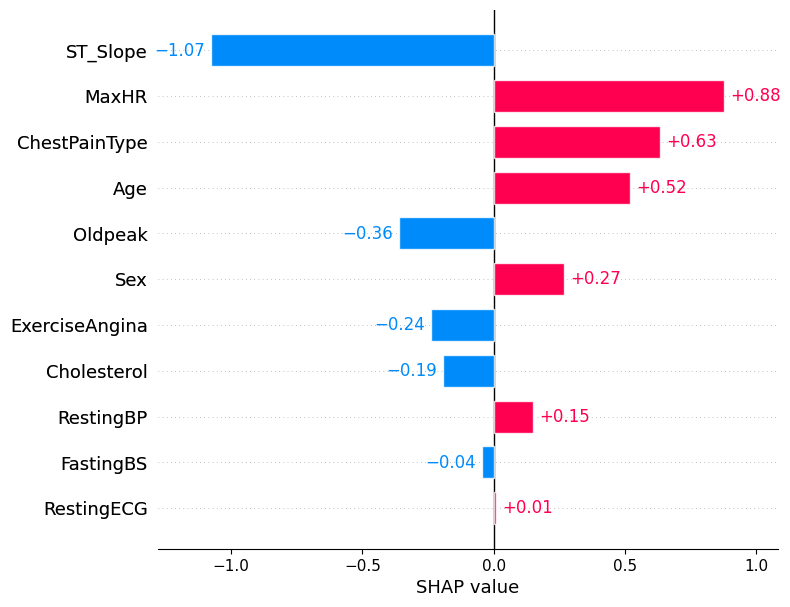

In [34]:
df_shap_values = tree_explainer(X_cat_train_cb)
shap_bp = shap.plots.bar(df_shap_values[0], max_display=X_cat_train_cb.shape[1])

### 4.4 Построить график `shap.plots.waterfall` для одного объекта выборки.

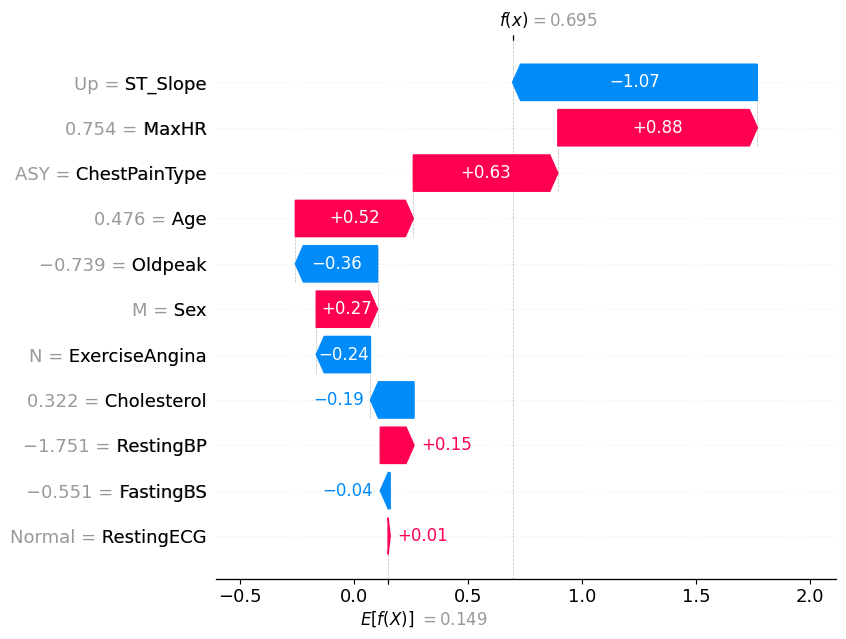

In [35]:
shap.plots.waterfall(df_shap_values[0], max_display=X_cat_train_cb.shape[1])

### 4.5 Построить 2 графика `shap.plots.scatter` для какого-нибудь признака. На одном раскрасить относительно себя, на втором &ndash; относительно другого признака.

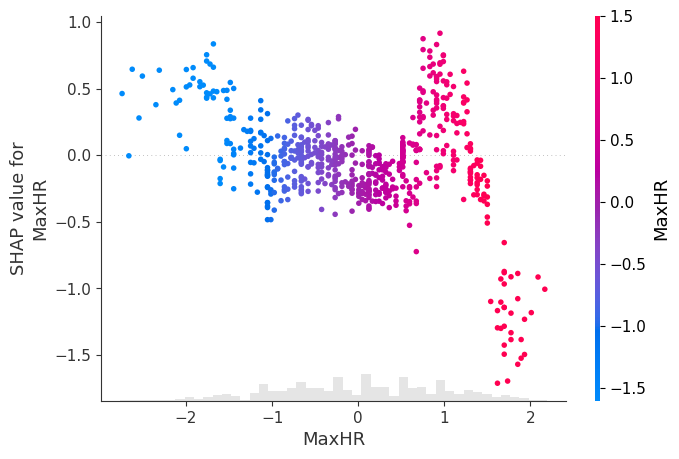

In [36]:
shap.plots.scatter(df_shap_values[:, "MaxHR"], color=df_shap_values[:, "MaxHR"])

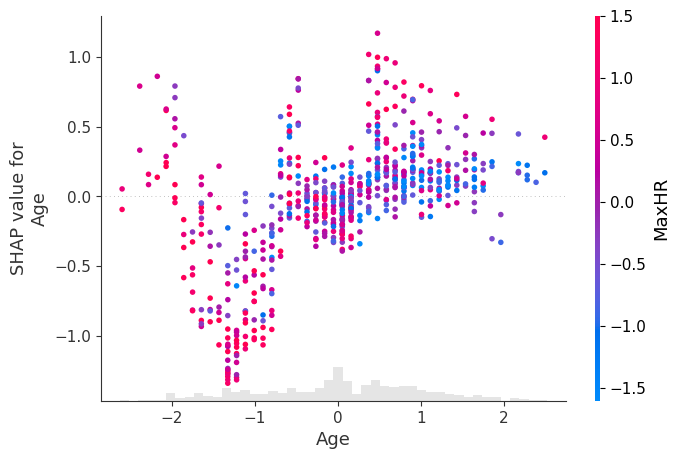

In [37]:
shap.plots.scatter(df_shap_values[:, "Age"], color=df_shap_values[:, "MaxHR"])

### 4.6 Построить график shap.plots.beeswarm для всех признаков.

<Axes: xlabel='SHAP value (impact on model output)'>

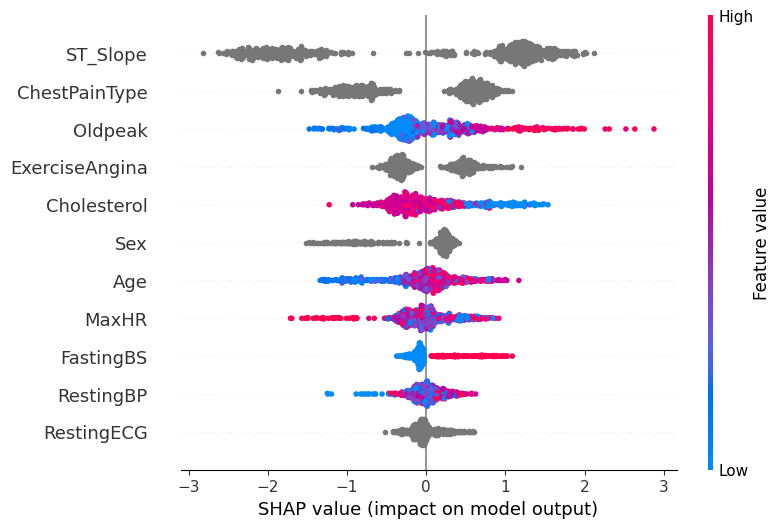

In [38]:
shap.plots.beeswarm(df_shap_values, max_display=X_cat_train_cb.shape[1], show=False)

### 4.7 Построить график shap.plots.bar для всех признаков.

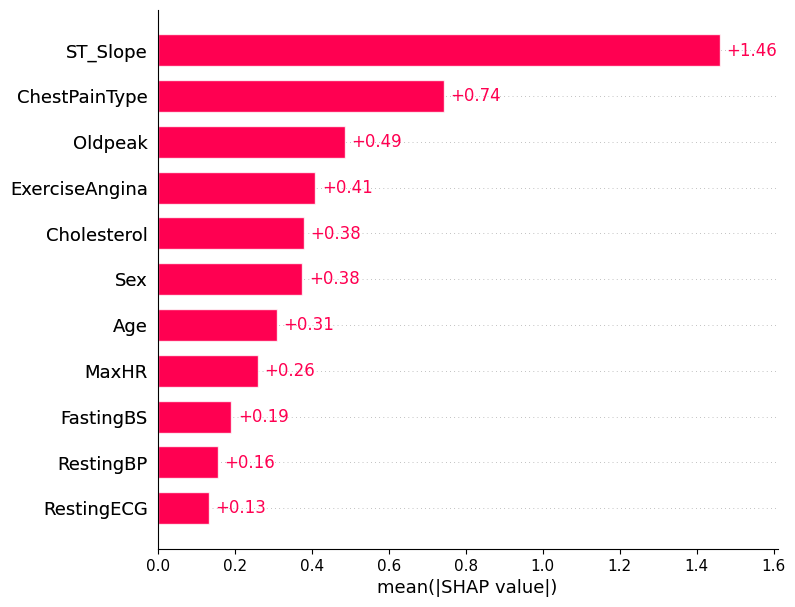

In [39]:
shap_bp = shap.plots.bar(df_shap_values, max_display=X_cat_train_cb.shape[1])

### 4.8 На основании двух последних графиков и/или используя feature_importance отфильровать признаки (отразить сформулированные выводы в тексте), переобучить лучшую модель.

Оставим признаки с CHAP > 0.4

In [40]:
filter_cols = ['ExerciseAngina', 'Oldpeak', 'ChestPainType', 'ST_Slope']

In [41]:
best.fit(X_cat_train_cb[filter_cols], y_train_map)

XGBClassifier(alpha=0.0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.11, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

### 4.9 Сравнить метрики до и после фильтрации.

In [42]:
y_pred = best.predict(X_cat_test_cb[filter_cols])
print(classification_report(y_test_map, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80       112
           1       0.90      0.79      0.84       164

    accuracy                           0.82       276
   macro avg       0.82      0.83      0.82       276
weighted avg       0.84      0.82      0.82       276



Метрики стали несколько хуже

### 4.10 Визуализировать полученное дерево решений.

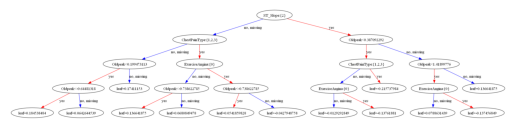

In [43]:
from xgboost import plot_tree
import xgboost as xgb
import matplotlib.pyplot as plt

plot_tree(best)
plt.show()

## 5. Регрессия

   - С использованием `GridSearchCV`/`grid_search` осуществить подбор гиперпараметра модели линейной регрессии с использованием $XGBoost$ или $CatBoost$.
     > [xgboost.XGBRegressor](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBRegressor) в $XGBoost$, [CatBoostRegressor](https://catboost.ai/en/docs/concepts/python-reference_catboostregressor) в $CatBoost$. В целом, можно выбрать новый таргет из уже полученного разбиения на обучающую и тестовыую выборки из пункта 2.
   - Вывести метрики $MSE$, $MAE$ и $R^2$ на тестовом наборе.
   - Переобучить модель на отфильтрованном наборе признаков из пункта 4.
   - Сравнить метрики до и после фильтрации.

### 5.1 С использованием `GridSearchCV`/`grid_search` осуществить подбор гиперпараметра модели линейной регрессии с использованием $XGBoost$ или $CatBoost$.

In [44]:
from catboost import CatBoostRegressor

In [45]:
target_train = X_cat_train_cb['Oldpeak']
X_train_regr = pd.concat([X_cat_train_cb.drop(['Oldpeak'], axis=1), y_train], axis=1)
X_train_regr['HeartDisease'] = pd.Categorical(X_train_regr['HeartDisease'])

target_test = X_cat_test_cb['Oldpeak']
X_test_regr = pd.concat([X_cat_test_cb.drop(['Oldpeak'], axis=1), y_test], axis=1)
X_test_regr['HeartDisease'] = pd.Categorical(X_test_regr['HeartDisease'])

In [46]:
cat_model = CatBoostRegressor(random_state=0, task_type='GPU', logging_level='Silent')

cat_grid = {
    'iterations': [100, 500, 1000],
    'learning_rate': [0.5, 0.1, 0.01],
    'depth': [4, 6, 8, 10],
    'task_type': ['GPU'],
    'early_stopping_rounds': [10]
}

cat_cols = [var for var in X_train_regr.columns if X_train_regr[var].dtype == 'category']

train_data_cat_cb = Pool(data=X_train_regr, label=target_train, cat_features=cat_cols)
test_data_cat_cb = Pool(data=X_test_regr, label=target_test, cat_features=cat_cols)

cat_grid_search_result = cat_model.grid_search(cat_grid, train_data_cat_cb, cv=5, train_size=0.9375, verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

### 5.2 Вывести метрики $MSE$, $MAE$ и $R^2$ на тестовом наборе.

In [47]:
cat_grid_search_result

{'params': {'task_type': 'GPU',
  'depth': 10,
  'od_wait': 10,
  'learning_rate': 0.5,
  'iterations': 100},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17],
              'test-RMSE-mean': [0.9509379185078997,
               0.9102678583258197,
               0.897098878675638,
               0.8844197541853054,
               0.8846008945661822,
               0.884590073480932,
               0.8848715646343115,
               0.8832626788753112,
               0.8864232596494501,
               0.8887839948033317,
               0.8914286103491958,
               0.8923601080943492,
               0.8940519550254178,
               0.9016823678508299,
    

In [48]:
best = CatBoostRegressor(task_type='GPU', depth=10, learning_rate=0.5, iterations=500, logging_level='Silent')

In [49]:
best.fit(X_train_regr, target_train, cat_features=cat_cols)

In [50]:
y_pred = best.predict(X_test_regr)

In [51]:
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE, r2_score as R2

In [52]:
print(f"Средняя квадратичная ошибка (MSE): {MSE(target_test, y_pred):.3f}")
print(f"Средняя абсолютная ошибка (MAE): {MAE(target_test, y_pred):.3f}")
print(f"Коэффициент детерминации (R2 score): {R2(target_test, y_pred):.3f}")

Средняя квадратичная ошибка (MSE): 0.728
Средняя абсолютная ошибка (MAE): 0.651
Коэффициент детерминации (R2 score): 0.118


### 5.3 Переобучить модель на отфильтрованном наборе признаков из пункта 4.

In [59]:
filter_cols = ['ExerciseAngina', 'ChestPainType', 'ST_Slope']

In [60]:
best.fit(X_train_regr[filter_cols], target_train, cat_features=['ST_Slope', 'ExerciseAngina', 'ChestPainType'])

### 5.4 Сравнить метрики до и после фильтрации.

In [61]:
y_pred = best.predict(X_test_regr[filter_cols])
print(f"Средняя квадратичная ошибка (MSE): {MSE(target_test, y_pred):.3f}")
print(f"Средняя абсолютная ошибка (MAE): {MAE(target_test, y_pred):.3f}")
print(f"Коэффициент детерминации (R2 score): {R2(target_test, y_pred):.3f}")

Средняя квадратичная ошибка (MSE): 0.653
Средняя абсолютная ошибка (MAE): 0.578
Коэффициент детерминации (R2 score): 0.209
